In [27]:
import numpy as np
np.bool = np.bool_
import pyemma.msm as msm
import pyemma.plots as mplt
import matplotlib as mt
import matplotlib.pyplot as plt
import MDAnalysis as mda
import sys
sys.path.append('../0_python_modules/')
import msm_analysis as ana

In [28]:
colors = np.array(['salmon', 'dodgerblue', 'teal', 'limegreen', 'sienna', 'violet'])
cmaps = [mt.colors.LinearSegmentedColormap.from_list('', colors[:i], N=i) for i in range(3, 7)]

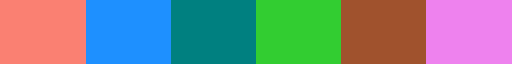

In [29]:
cmaps[3]

In [30]:
trajs = np.array([
    f'LONG_TRAJ/{i}.xtc' for i in ['1f','2_2','2f_1','3_1','3_2','4f','5f']
] + [
    f'SHORT_TRAJ_subunit1/{i}.xtc' for i in range(1,63)
] + [
    f'SHORT_TRAJ_subunit2/{i}.xtc' for i in range(1,41)
] + [
    f'SHORT_TRAJ_intermediate/{i}.xtc' for i in range(1,21)
])
path = '../1_datasets/mopR_bindings/'
pdb = 'p2e.pdb'

In [31]:
def get_frames(model, mdis, dtrj, stds, 
               microstate='large', trj='most'):
    xtcs = []
    frames = []
    for a,macro in enumerate(mdis):
        if microstate=='large':
            micro = macro[ stds[macro].argmax() ]
        else:
            micro = macro[ stds[macro].argmin() ]
            
        nframes = [np.where(dd==micro)[0].shape[0] for dd in dtrj]
        if trj=='most':
            dd = np.argmax(nframes)
        else:
            dd = np.argmin(nframes)
            
        frames.append( np.where(dtrj[dd] == micro)[0] )
        xtcs.append(dd)
        
    return xtcs, frames

def write_frames(path, pdb, trajs, idata,
                tid, fid, nconfs=10, otype='random', sel='all',
                ofmt='pdb', opath='./', oname='frame'):
    
    uni = mda.Universe(f'{path}{pdb}', f'{path}{trajs[tid]}')
    
    dd = idata[tid][fid]
    
    if otype=='random':
        np.random.seed(0)
        oframes = np.random.choice(fid, nconfs)
    elif otype == 'min':
        oframes = fid[dd.argsort()[:nconfs]]
    elif otype == 'max':
        oframes = fid[dd.argsort()[::-1][:nconfs]]
    elif otype == 'variable':
        oframes = fid[dd.argsort()[::int(len(fid)/nconfs)][:nconfs]]
    else:
        raise ValueError(f'{otype} not in [random, variable, min, max]')
        
    for a,i in enumerate(oframes):
        uni.trajectory[i]
        uni.select_atoms(f'{sel}').write(f'{opath}{oname}{a}.{ofmt}')

In [32]:
idata = np.load('../1_datasets/mopR_bindings/distance_alldata.npy', allow_pickle=True)

<font size=3>
    i=3 <br>
    20, [30,40,45] : all int, 2 bounds <br>
    <br>
    30, [40,45,50] :: all int, 2 bounds <br>
    <br>
    50, [40,45] :: int extended, 2 bound <br>
    <br>
    70, [35,40,45] :: int extended, 2 bound <br>
    <br>
    100, [25,35,40,45,50] :: int extended, 2 bound <br>
    <br>
    150, [25,30,35,40,45,50] :: some int extended, multi bounds <br>
    <br>
    250, [25,30,35,40,45,50] :: some int extended, multi bounds <br>
    <br>
    350, [40,50] :: int, multi-bounds <br>
    <br>
    500, [25,35,40,45,50]:: some int extended, multi bounds <br>
    <br>
    700, [30,35,40,45,50] :: int, multi-bounds <br>
    <br>
    1000, [25,35,40,45,50]:: some int extended, multi bounds <br>
    <br>
    1500, [25,30,35,40,45,50] :: int, multi-bounds, some bad <br>
    <br>
    <br>

In [6]:
h=2
i=3

tic2 = np.load(f'ticas/h{h}_tic2_{i}.npz')
tic2 = np.concatenate(([tic2[k] for k in list(tic2)]))

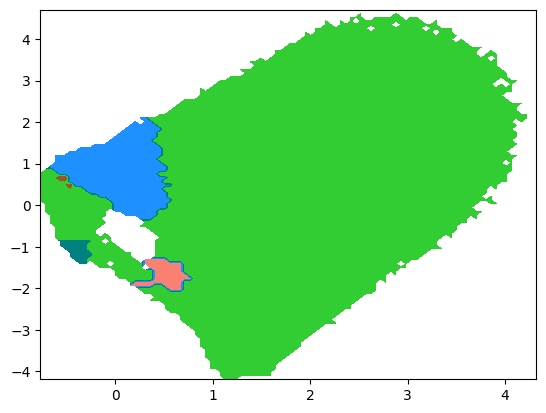

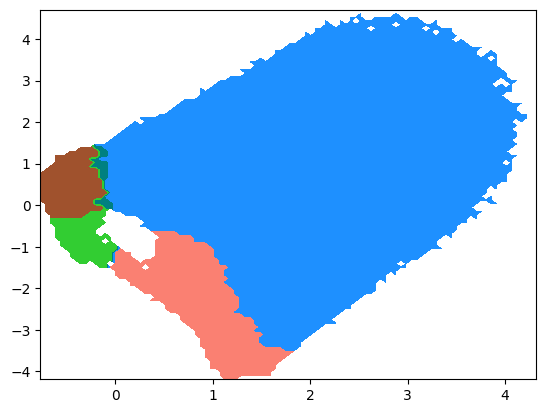

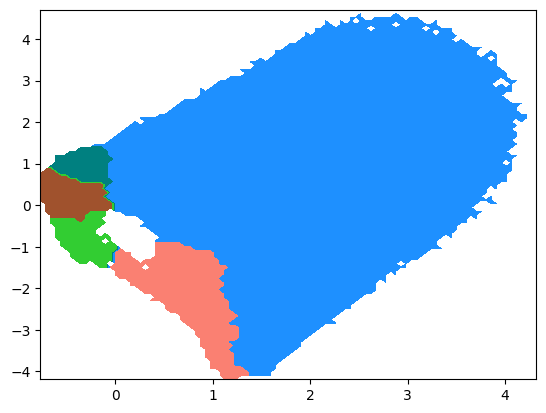

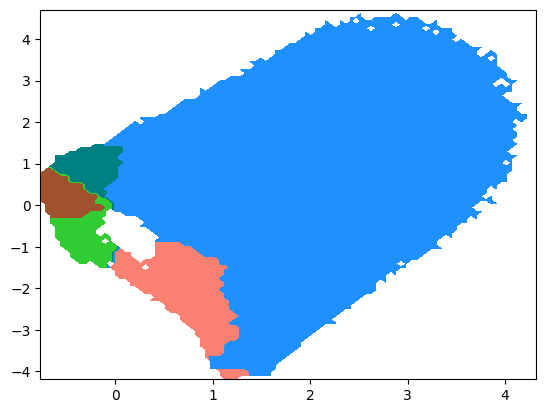

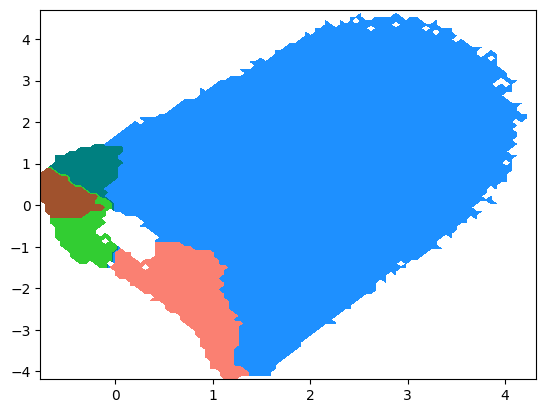

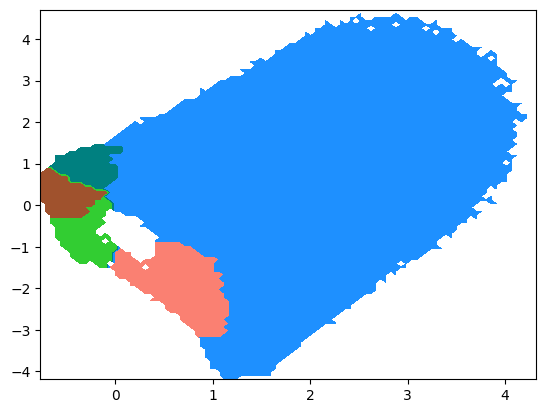

In [13]:
cl=1500
ml=[25,30,35,40,45,50]
pc=5

dtrj = np.load(f'urf/saved_h{2}_msm/dtraj_{i}_{cl}.npz')
dtrj = [dtrj[k] for k in list(dtrj)]

for lag in ml:
    model = msm.estimate_markov_model(dtrj, lag=lag)
    model.pcca(pc)

    mplt.plot_state_map(tic2[:,0], tic2[:,1],
                       model.metastable_assignments[np.concatenate((model.dtrajs_active))],
                       cbar=False, cmap=cmaps[pc-3])
plt.show()

In [7]:
h=2
i=3
cl=1500
ml=45
pc=5

tic2 = np.load(f'ticas/h{h}_tic2_{i}.npz')
tic2 = np.concatenate(([tic2[k] for k in list(tic2)]))

dtrj = np.load(f'urf/saved_h{2}_msm/dtraj_{i}_{cl}.npz')
dtrj = [dtrj[k] for k in list(dtrj)]

model = msm.estimate_markov_model(dtrj, lag=ml)
model.pcca(pc)
mdis=model.metastable_sets
mdis

[array([   3,   12,   46,   48,   54,   66,   81,   90,   94,  118,  124,
         164,  172,  179,  181,  215,  217,  228,  235,  238,  241,  255,
         260,  278,  282,  298,  321,  324,  333,  342,  352,  353,  382,
         402,  433,  443,  444,  449,  454,  464,  500,  520,  527,  556,
         558,  605,  620,  625,  634,  647,  648,  651,  664,  666,  674,
         675,  695,  705,  744,  745,  751,  782,  786,  820,  824,  836,
         844,  872,  892,  905,  916,  918,  970,  986,  995,  997, 1023,
        1027, 1050, 1057, 1075, 1089, 1101, 1130, 1135, 1146, 1153, 1159,
        1167, 1170, 1176, 1181, 1184, 1205, 1252, 1255, 1287, 1288, 1302,
        1306, 1307, 1318, 1328, 1339, 1390, 1394, 1416, 1445, 1457, 1460,
        1462, 1463, 1485]),
 array([   0,    2,    4, ..., 1497, 1498, 1499]),
 array([  19,   34,   63,   86,   88,  117,  188,  226,  231,  295,  372,
         377,  390,  418,  468,  478,  531,  532,  533,  538,  565,  668,
         688,  704,  717,  747,  

In [9]:
pr = ana.analyze_msm_clusters(dtrj)
pr.take_data(idata)
means, stds, probs = pr.get_mean()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 129/129 [00:04<00:00, 26.22it/s]


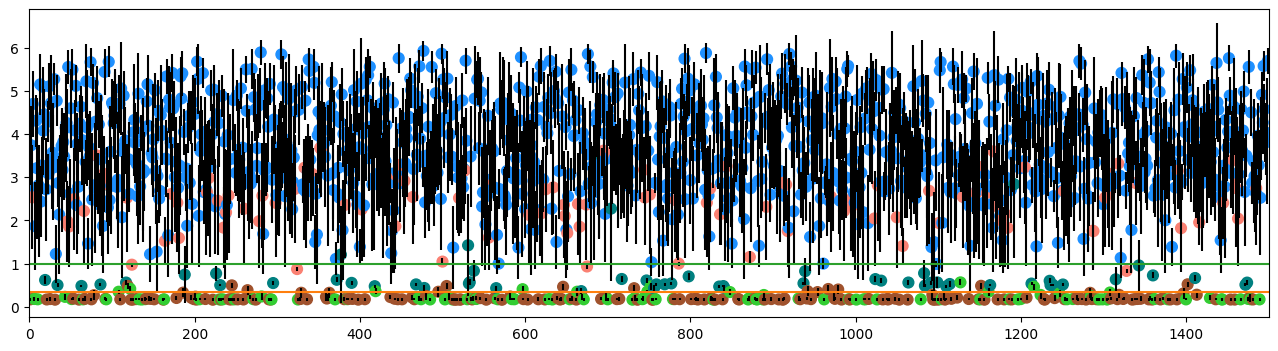

In [10]:
mcolors = np.zeros((cl))
for a,k in enumerate(model.metastable_sets):
    mcolors[k] = a
    
fig,ax=plt.subplots(1, figsize=(16,4))
ax.errorbar(range(cl), means, fmt='.', yerr=stds, ms=0, ecolor='black')
ax.scatter(range(cl), means, c=colors[mcolors.astype(int)], s=60)
ax.plot([0,cl-1],[0.35,0.35])
ax.plot([0,cl-1],[1,1])
ax.set_xlim(-1,cl)
plt.show()

In [14]:
state_labels = ['I2','U','I','B1','B2']

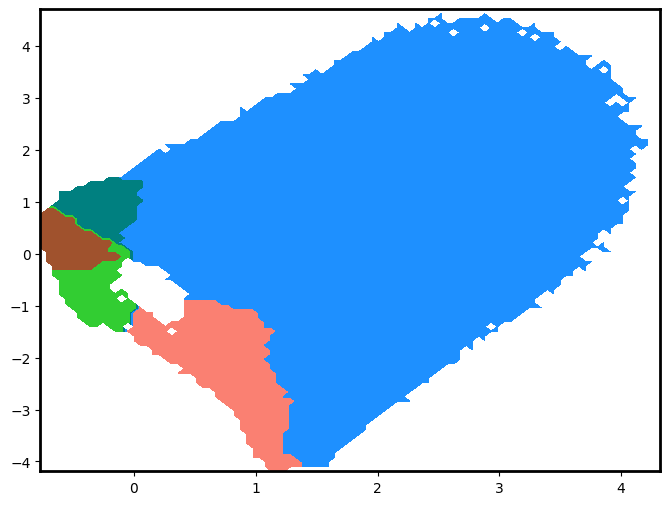

In [15]:
fig,ax=plt.subplots(1,figsize=(8,6))
mplt.plot_state_map(tic2[:,0], tic2[:,1],
                   model.metastable_assignments[np.concatenate((model.dtrajs_active))],
                   cbar=False, cmap=cmaps[pc-3], ax=ax)
ax.spines[:].set_linewidth(2)
plt.savefig(f'plots/statemap_{h}_{i}_{cl}_{ml}_{pc}.pdf')
plt.show()

In [16]:
for a, k in enumerate(mdis): print(a,model.pi[k].sum())

0 0.021661319018445986
1 0.13019007624373044
2 0.0316715945092579
3 0.18954840584749097
4 0.6269286043810756


In [17]:
fr = ml * 10 * 10**(-6)
for k in range(pc-1):
    for j in range(k+1,pc):
        print(k,j,model.mfpt(mdis[k], mdis[j])*fr, model.mfpt(mdis[j], mdis[k])*fr)

0 1 1.097079633689164 18.47604526101027
0 2 10.91166600361704 86.65928212387645
0 3 16.29507431016947 94.99261565015556
0 4 14.620886851526608 94.91623193110858
1 2 10.031762625197917 47.21205947597925
1 3 15.684164367941792 56.209366473569915
1 4 13.968140760501916 56.01200978266279
2 3 3.747537860908229 8.58387415556315
2 4 1.6973121432501592 8.15377218962322
3 4 0.46547314946514257 1.857472881978393


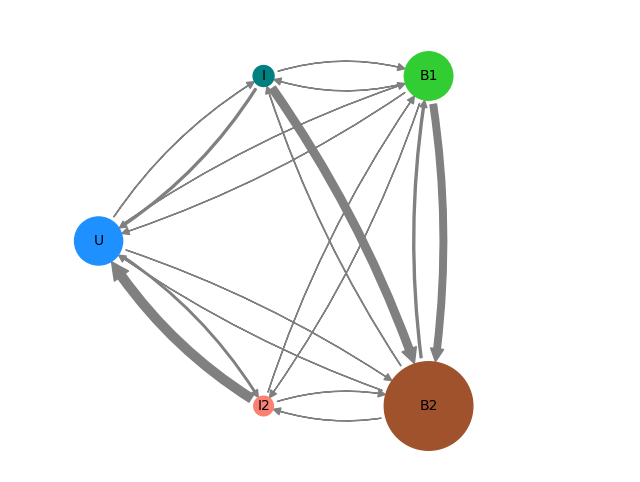

In [20]:
mdtrj = ana.get_mdtrj(dtrj, mdis, output_type='trj')
mmodel = msm.estimate_markov_model(mdtrj, lag=ml)

fig,ax=plt.subplots(1, figsize=(8,6))
mplt.plot_markov_model(mmodel, 
                       pos=np.array([[1,-1],[0,0],[1,1],[2,1],[2,-1]]), 
                       state_colors=colors[:pc], state_labels=state_labels,
                       arrow_labels=None, arrow_scale=1.4, ax=ax
                      )
plt.savefig(f'plots/markov_model_{h}_{i}_{cl}_{ml}_{pc}.pdf')
plt.show()

In [21]:
flux = msm.tpt(model, mdis[1], mdis[4])
cg, cgflux = flux.coarse_grain(mdis)
print(cgflux.committor)
paths, path_fluxes = cgflux.pathways(fraction=0.99)
for a,i in enumerate(paths):
    print(i, path_fluxes[a]/np.sum(path_fluxes))

[0.         0.01418222 0.8632982  0.99792122 1.        ]
[0 2 4] 0.8138476244720277
[0 4] 0.0937039870415686
[0 3 4] 0.06505708581669074
[0 1 3 4] 0.027391302669712774


In [22]:
fid=get_frames(model, mdis, dtrj, stds)
fid

([1, 1, 1, 89, 76],
 [array([ 98517,  98528,  98560,  98564,  98670,  98707,  99429,  99451,
          99454,  99643,  99656,  99659,  99666,  99674,  99675,  99711,
          99784, 100056, 100064, 100065, 100066, 100071, 100182, 100224,
         100242, 100247, 100248, 100251, 100264, 100268, 100275, 100283,
         100290, 100292, 100294, 100301, 100305, 100308, 100310, 100396,
         100399, 100415, 100472, 100474, 100475, 100482, 100494, 100496,
         100499, 100500, 100503, 100511, 100524, 100525, 100526, 100544,
         100614, 100617, 100618, 100619, 100626, 100631, 100638, 100754,
         100798, 100803, 101011, 101253, 101398, 101403, 101452, 101655,
         102092, 102095, 102097, 102098, 102099, 102107, 102109, 102113,
         102115, 102116, 102120, 102121, 102126, 102127, 102133, 102148,
         102151, 102341, 102342, 102343, 102345, 102346, 102347, 102356,
         102358, 102497, 102972, 102985, 102986, 102992, 102996, 102997,
         102999, 103016, 103019

In [26]:
for i in zip(fid[0], fid[1], ['variable','variable','max','min','min'], ['i2','unbound', 'int', 'b1', 'b2']):
    write_frames(path=path, pdb=pdb, trajs=trajs, idata=idata,
                tid=i[0], fid=i[1], nconfs=20, otype=i[2], sel='all',
                opath='saved_MSM5/', oname=i[3])

/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1151: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1198: UserWarning: Found missing chainIDs. Corresponding atoms will use value of 'X'
  warnings.warn("Found missing chainIDs."


## h=3, i=2, cl=1500, ml=30, pc=5

In [33]:
h=2
i=3
cl=1500
ml=30
pc=5

tic2 = np.load(f'ticas/h{h}_tic2_{i}.npz')
tic2 = np.concatenate(([tic2[k] for k in list(tic2)]))

dtrj = np.load(f'urf/saved_h{2}_msm/dtraj_{i}_{cl}.npz')
dtrj = [dtrj[k] for k in list(dtrj)]

model = msm.estimate_markov_model(dtrj, lag=ml)
model.pcca(pc)
mdis=model.metastable_sets
mdis

[array([   3,   11,   12,   42,   46,   48,   54,   66,   81,   90,   94,
         118,  121,  124,  131,  164,  172,  177,  179,  181,  215,  217,
         228,  235,  238,  241,  255,  260,  261,  278,  282,  298,  300,
         321,  324,  331,  333,  342,  347,  352,  353,  382,  402,  423,
         433,  443,  444,  448,  449,  454,  455,  464,  500,  520,  527,
         549,  554,  556,  558,  559,  591,  605,  610,  620,  625,  634,
         641,  647,  648,  651,  664,  666,  674,  675,  695,  705,  744,
         745,  751,  757,  782,  786,  820,  824,  836,  844,  872,  892,
         905,  916,  918,  934,  963,  964,  970,  986,  995,  997, 1023,
        1027, 1035, 1041, 1050, 1057, 1075, 1089, 1101, 1122, 1130, 1135,
        1146, 1153, 1158, 1159, 1167, 1170, 1176, 1181, 1184, 1205, 1214,
        1218, 1225, 1240, 1252, 1255, 1272, 1287, 1288, 1293, 1302, 1306,
        1307, 1313, 1314, 1318, 1328, 1339, 1361, 1385, 1387, 1390, 1394,
        1416, 1435, 1445, 1457, 1460, 

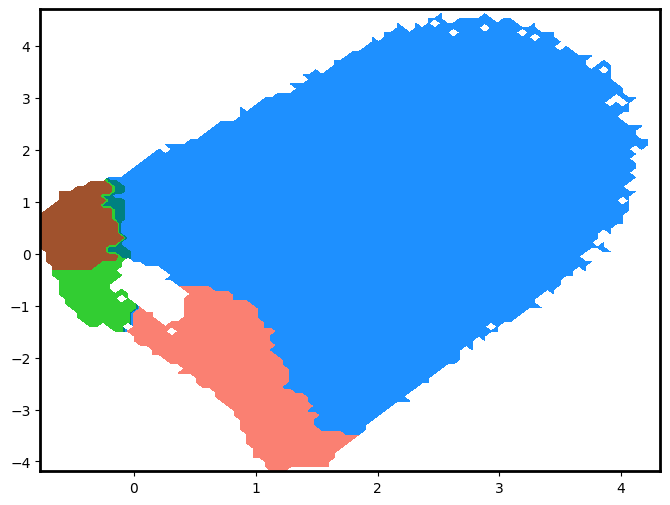

In [34]:
fig,ax=plt.subplots(1,figsize=(8,6))
mplt.plot_state_map(tic2[:,0], tic2[:,1],
                   model.metastable_assignments[np.concatenate((model.dtrajs_active))],
                   cbar=False, cmap=cmaps[pc-3], ax=ax)
ax.spines[:].set_linewidth(2)
plt.savefig(f'plots/statemap_{h}_{i}_{cl}_{ml}_{pc}.pdf')
plt.show()

In [35]:
h=2
i=3
cl=1500
ml=25
pc=5

tic2 = np.load(f'ticas/h{h}_tic2_{i}.npz')
tic2 = np.concatenate(([tic2[k] for k in list(tic2)]))

dtrj = np.load(f'urf/saved_h{2}_msm/dtraj_{i}_{cl}.npz')
dtrj = [dtrj[k] for k in list(dtrj)]

model = msm.estimate_markov_model(dtrj, lag=ml)
model.pcca(pc)
mdis=model.metastable_sets
mdis

[array([ 181,  260,  352,  433,  705,  751,  786, 1101, 1167, 1181, 1318,
        1457, 1462]),
 array([   9,   19,   32,   34,   36,   63,   71,   76,   86,   88,   89,
         103,  112,  117,  138,  146,  154,  168,  188,  224,  226,  231,
         237,  295,  309,  317,  346,  348,  371,  372,  377,  379,  390,
         400,  408,  417,  418,  438,  441,  468,  478,  513,  531,  532,
         533,  538,  548,  552,  564,  565,  568,  583,  592,  607,  612,
         614,  631,  638,  650,  668,  683,  688,  696,  704,  717,  726,
         747,  753,  756,  759,  762,  767,  769,  777,  778,  798,  823,
         835,  840,  841,  850,  865,  883,  919,  925,  937,  939,  945,
         956,  957,  960,  961,  965,  999, 1003, 1009, 1015, 1024, 1030,
        1031, 1064, 1083, 1084, 1091, 1092, 1095, 1098, 1099, 1110, 1114,
        1139, 1150, 1155, 1163, 1166, 1178, 1183, 1192, 1206, 1213, 1219,
        1227, 1235, 1236, 1239, 1245, 1251, 1276, 1315, 1321, 1329, 1334,
        1343, 13

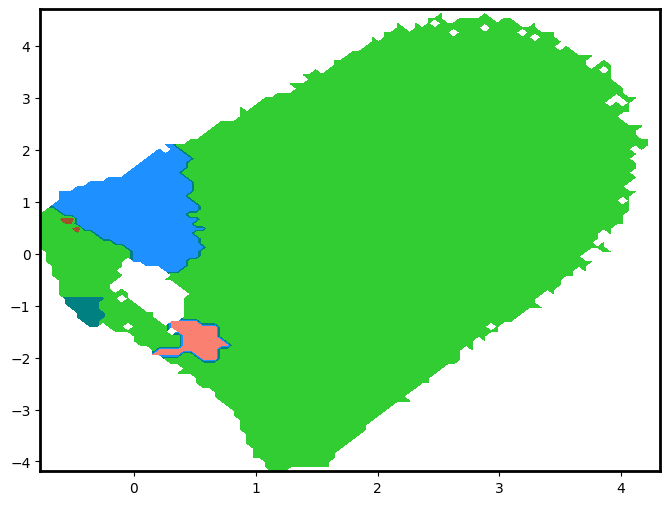

In [36]:
fig,ax=plt.subplots(1,figsize=(8,6))
mplt.plot_state_map(tic2[:,0], tic2[:,1],
                   model.metastable_assignments[np.concatenate((model.dtrajs_active))],
                   cbar=False, cmap=cmaps[pc-3], ax=ax)
ax.spines[:].set_linewidth(2)
plt.savefig(f'plots/statemap_{h}_{i}_{cl}_{ml}_{pc}.pdf')
plt.show()